# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

#### From the CRISP-DM: "Towards a Standard Process Model for Data Mining" paper by Rüdiger Wirth and the associated CRISP-DM manual I see that the purpose of Phase 1: Business Understanding is to:
1. focus on understanding the project objectives and requirements from a business perspective
2. convert this knowledge into a data mining problem definition, and a preliminary project plan designed to achieve the objectives."

Following this convention this would be my phase 1 response

Having worked in this industry for a few years in my early twenties, I can confidently say that the primary objective of this project is to determine what customers value most in a used "vehicle".
My goal is to determine which characteristics of a used car inventory will provide the best probability of a(controlled and lucrative) sale for any given car.
Additional Insight: There is a cost associated with maintaining a used car inventory.  These costs include, repair, refurbishment, licensing, maintenance, time, etc. Decisons have to be made (by the sales management staff) about which combination and number of these operating costs to apply to the base ingestion price of a given used car.  This is a per vehicle process that typically follows a specific algorithm. In my experience the process was the same whether the used car was obtained as a trade-in, an outright purchase, or an auction purchase.  The driving force behind this effort is every dealship's continuous desire to: 1. have strict control over used car "time-in-inventory" and 2. maximize "net profit".
Finding the "feature" or "features" of a used car that will support their ultimate goal would place me in the Used Car Salesman Hall of Fame.

One important thing I would like to point about this problem that would beg a conversation with used car domain experts/stakeholders (for clarity) is the use of the word "value" in the problem overview.
I'm afraid the customer value signal cannot be obtained from the current 18 features.

When I was that slimy used car guy years ago, we would say "A good deal is a state of mind".  Of course, it was our job to strictly control that state of mind.
That phrase is a universal truth as well as a coping mechanism.  That is what salespeople say to make themselves feel better when they make a killing on a sale; meaning they sold it for a lot more than what the dealership purchased it for.
I say all that to say, value != price. I believe the dataset can't capture "value" in its current state without historic sales data.  Knowing WHICH used cars sold for HOW MUCH and WHEN compared to INGESTION DATA is essential information.
Dealerships definitely have that information so, with a firm understanding of the problem, I would have to circle back and ask the dealership stakeholders for additional features like Vehicle Purchased/Traded Date/Time, Vehicle Sold Data/Time, and "Actual" Sale Price.   That is absolutely necessary to be able to provide clear recommendations for what consumers "value" in a used car.

For the sake of this assigment I can only explore the effects of the features on the "**asking price**" to expose used car pricing trends that the sales team may not be aware of.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv("data/vehicles.csv")
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


EXPLORING MISSING VALUES

In [4]:
# Since we might be checking for missing data repeatedly
def summarize_missing_values(dframe):
    counts_of_missing_per_feature = dframe.isnull().sum()
    percentages_missing_per_feature = (counts_of_missing_per_feature / len(dframe)) * 100

    missing_summary = pd.DataFrame({
                                    'missing_count': counts_of_missing_per_feature ,
                                    'missing_percent': percentages_missing_per_feature.round(2)
                                })

    missing_summary.sort_values(by='missing_percent', ascending=False, inplace=True)
    print(missing_summary)

In [5]:
# Is the raw data like swiss cheese
summarize_missing_values(df)


              missing_count  missing_percent
size                 306361            71.77
cylinders            177678            41.62
condition            174104            40.79
VIN                  161042            37.73
drive                130567            30.59
paint_color          130203            30.50
type                  92858            21.75
manufacturer          17646             4.13
title_status           8242             1.93
model                  5277             1.24
odometer               4400             1.03
fuel                   3013             0.71
transmission           2556             0.60
year                   1205             0.28
id                        0             0.00
region                    0             0.00
price                     0             0.00
state                     0             0.00


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

#### Giving these outputs, and based on my revised focus (dealership pricing perspective) I have decided to drop the following columns early based on data condition and or domain knowledge:
1 id - id is just an inventory number for a particular used vehicle; an internal administrative tag for the dealership for accounting purposes and others; no pricing. <br>
2 VIN is just a purely administrative property of the car. Either a vehicle  has one or it doesn't. Presence or absence doesn't affect price since dealerships can't sell cars without VIN plates.<br>
3 size - too many values missing and some of that signal is captured by the model feature.<br>
4.paint_color - unless it is some sort of unicorn-like special paint job that dealers are confident they can make money on, the paint color is not important.  Only to the customer.<br>

In [6]:
df_lite = df.drop(columns=["id", "size", "paint_color"])  # retaining VIN until after the VIN duplicate check
nan_thresh = 4
df_lite = df_lite[df_lite.notnull().sum(axis=1) >= nan_thresh] #  dropping rows with fewer than n non-NaN values
df_lite.shape

(426812, 15)

DUPLICATE HANDLING

In [7]:
# Count duplicate VINs
duplicate_VIN = df_lite[df_lite.duplicated(subset='VIN', keep=False)]

# A snapshot of how many VINs appear more than once
print(duplicate_VIN ['VIN'].value_counts().head())
print(duplicate_VIN.shape)

# Drop VIN duplicates then drop the VIN column since it has served its purpose
df_lite = df_lite.drop_duplicates(subset='VIN', keep='first')
df_lite = df_lite.drop(columns=["VIN"])
df_lite.shape


VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
Name: count, dtype: int64
(348846, 15)


(118247, 14)

In [8]:
# Now we check for/handle row duplicates yes?
num_dupes = df_lite.duplicated().sum()
print(f"Exact duplicate rows: {num_dupes}")

# Drop exact duplicate rows (keep first occurrence)
df_lite = df_lite.drop_duplicates()

num_dupes = df_lite.duplicated().sum()
print(f"Exact duplicate rows: {num_dupes}")
df_lite.shape

Exact duplicate rows: 163
Exact duplicate rows: 0


(118084, 14)

DATA IMPUTATION

In [9]:
# df_clean_imp = df_lite.copy()
# df_clean_imp.info()

In [10]:
# working_df = df_clean_imp.copy()

In [11]:
# # Mean/Mode Fill the working df if that is what is needed
# for col in working_df.columns:
#     if working_df[col].dtype in ['float64', 'int64']:
#         working_df[col] = working_df[col].fillna(working_df[col].mean())
#     elif working_df[col].dtype == 'object':
#         working_df[col] = working_df[col].fillna(working_df[col].mode()[0])

In [12]:
# summarize_missing_values(working_df)
# print(working_df.shape)

In [13]:
# print(working_df.describe())

CREATING A DROPNA'd VERSION OF THE DATA FOR COMPARISON  <-- TESTS WERE RUN FOLLOWING IMPUTED DATA TESTING AND THE DROPNA RESULTS WERE FAR SUPERIOR

In [14]:
df_clean_dna = df_lite.copy().dropna() # this is the fully NaN sanitized version without imputation
print(df_clean_dna.shape)
print(df_clean_dna.info())
working_df = df_clean_dna.copy()

(34697, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 34697 entries, 31 to 426833
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        34697 non-null  object 
 1   price         34697 non-null  int64  
 2   year          34697 non-null  float64
 3   manufacturer  34697 non-null  object 
 4   model         34697 non-null  object 
 5   condition     34697 non-null  object 
 6   cylinders     34697 non-null  object 
 7   fuel          34697 non-null  object 
 8   odometer      34697 non-null  float64
 9   title_status  34697 non-null  object 
 10  transmission  34697 non-null  object 
 11  drive         34697 non-null  object 
 12  type          34697 non-null  object 
 13  state         34697 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 4.0+ MB
None


In [15]:
# Prices and Odometer values approaching 1M should be examined
working_df[working_df['price'] > 1e6]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state


In [16]:
working_df[working_df['odometer'] > 1e6]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state
76874,denver,2995,1999.0,audi,a4,good,6 cylinders,gas,2319010.0,clean,automatic,4wd,sedan,co
119725,treasure coast,1000,1992.0,ford,f150 longbed,salvage,6 cylinders,gas,3000000.0,clean,manual,rwd,truck,fl
137441,spokane / coeur d'alene,3850,2002.0,mercedes-benz,ml-500,excellent,8 cylinders,gas,1111111.0,clean,automatic,4wd,SUV,id
144401,"quad cities, IA/IL",7999,2012.0,ford,escape,good,6 cylinders,gas,1096000.0,clean,automatic,4wd,SUV,il
151648,indianapolis,6495,2010.0,chrysler,town country touring,good,6 cylinders,gas,1200290.0,clean,automatic,fwd,mini-van,in
156057,cedar rapids,5999,2008.0,ford,escape limited,excellent,6 cylinders,gas,1130401.0,clean,automatic,4wd,SUV,ia
176057,new orleans,15999,2013.0,ford,f-150,excellent,8 cylinders,gas,1701289.0,lien,automatic,rwd,truck,la
242659,raleigh / durham / CH,10900,2011.0,bmw,x5,excellent,6 cylinders,diesel,1320000.0,clean,automatic,4wd,SUV,nc
328533,erie,600,1981.0,ford,f-150,fair,8 cylinders,gas,9999999.0,clean,manual,rwd,truck,pa
334534,philadelphia,2946,1964.0,buick,wagon,fair,8 cylinders,gas,9999999.0,clean,manual,rwd,wagon,pa


SETTING LIMITS ON PRICE AND ODOMETER VALUES

In [17]:
# Dropping the insaaaaane prices
working_df = working_df[working_df['price'] <= 1e6]

In [18]:
# and the 10M mile van has to go too.  The remaining high-mileages are all plausible
working_df = working_df[working_df['odometer'] <= 1e6]

In [19]:
working_df.reset_index(drop=True, inplace=True)
working_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,al
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,al
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,al
3,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,al
4,auburn,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,rwd,other,al


In [20]:
# A little pre-visualization feature engineering is necessary to expose useful numeric values hidden in strings and to look for high cardinality features to handle
def get_unique_values_by_column(dframe):
    for col in dframe.select_dtypes(include='object').columns:
        unique_vals = dframe[col].dropna().unique()
        print(f"{col} ({len(unique_vals)} unique):")
        print(unique_vals[:41])
        print("-" * 40)
get_unique_values_by_column(working_df)

region (392 unique):
['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'fairbanks' 'kenai peninsula'
 'southeast alaska' 'flagstaff / sedona' 'mohave county' 'phoenix'
 'prescott' 'show low' 'sierra vista' 'tucson' 'yuma' 'fayetteville'
 'fort smith' 'jonesboro' 'little rock' 'texarkana' 'bakersfield' 'chico'
 'fresno / madera' 'gold country' 'hanford-corcoran' 'humboldt county'
 'imperial county' 'inland empire' 'los angeles' 'mendocino county'
 'merced' 'modesto' 'monterey bay' 'orange county' 'palm springs']
----------------------------------------
manufacturer (41 unique):
['ford' 'gmc' 'chevrolet' 'jeep' 'nissan' 'toyota' 'ram' 'infiniti'
 'chrysler' 'bmw' 'mazda' 'mercedes-benz' 'ferrari' 'lexus' 'audi'
 'mitsubishi' 'dodge' 'volkswagen' 'honda' 'hyundai' 'fiat' 'kia'
 'cadillac' 'rover' 'jaguar' 'lincoln' 'mini' 'volvo' 'buick' 'acura'
 'subaru' 'porsche' 'alfa-romeo' 'sa

## The DATA CLEANING way ahead with rationale:
region drop, too specific, too much to encode + too many questions <br>
manufacturer keep, Group by global region European, American, Japanese, Asian, etc then encode as nominal <br>
model drop, too much to encode <br>
condition  keep and encode as ordinal <br>
cylinders   check counts of "other", convert to int feature <br>
fuel   keep and encode as nominal <br>
title_status  keep and encode as nominal <br>
transmission  keep and encode as nominal <br>
drive  keep and encode as nominal <br>
type  keep, histogram value counts for shrinking this feature,  encode as norminal (be prepared to circle back an redo this step with a lesser top # collapse applied) <br>
state (51 unique) keep, convert states to region map grouping, encode as nominal <br>

DROP TWO

In [21]:
working_df.drop(columns=["region", "model"], inplace=True)
# working_df.info()

GROUP MANUFACTURERS

In [22]:
american = [
    "gmc", "chevrolet", "ford", "jeep", "ram", "cadillac", "buick",
    "lincoln", "chrysler", "dodge", "pontiac", "mercury", "saturn",
    "tesla", "harley-davidson"]

japanese = [
    "toyota", "nissan", "mazda", "honda", "lexus", "acura", "subaru",
    "mitsubishi", "infiniti", "datsun"]

asian = [
    "hyundai", "kia"]

european = [
    "volvo", "audi", "bmw", "mercedes-benz", "porsche", "fiat",
    "jaguar", "mini", "rover", "land rover", "alfa-romeo",
    "aston-martin", "ferrari", "volkswagen"]


In [23]:
manufacturer_region = {}

for brand in american:
    manufacturer_region[brand] = "american"
for brand in japanese:
    manufacturer_region[brand] = "japanese"
for brand in asian:
    manufacturer_region[brand] = "asian"
for brand in european:
    manufacturer_region[brand] = "european"

working_df['manufacturer_region'] = working_df['manufacturer'].map(manufacturer_region)
working_df.drop(columns=['manufacturer'], inplace=True)
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34680 entries, 0 to 34679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                34680 non-null  int64  
 1   year                 34680 non-null  float64
 2   condition            34680 non-null  object 
 3   cylinders            34680 non-null  object 
 4   fuel                 34680 non-null  object 
 5   odometer             34680 non-null  float64
 6   title_status         34680 non-null  object 
 7   transmission         34680 non-null  object 
 8   drive                34680 non-null  object 
 9   type                 34680 non-null  object 
 10  state                34680 non-null  object 
 11  manufacturer_region  34680 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.2+ MB


CONVERT CYLINDERS TO NUMERIC

In [24]:
cond = (working_df.fuel == "other")
len(pd.DataFrame(working_df[cond]))

550

In [25]:
cond = (working_df.cylinders == "other")
len(pd.DataFrame(working_df[cond]))

88

In [26]:
# Droping these 469 records wont hurt
working_df = working_df[working_df['cylinders'] != 'other']
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34592 entries, 0 to 34679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                34592 non-null  int64  
 1   year                 34592 non-null  float64
 2   condition            34592 non-null  object 
 3   cylinders            34592 non-null  object 
 4   fuel                 34592 non-null  object 
 5   odometer             34592 non-null  float64
 6   title_status         34592 non-null  object 
 7   transmission         34592 non-null  object 
 8   drive                34592 non-null  object 
 9   type                 34592 non-null  object 
 10  state                34592 non-null  object 
 11  manufacturer_region  34592 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.4+ MB


In [27]:
working_df['cylinders'] = working_df['cylinders'].str.extract('(\d+)').astype('int64')
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34592 entries, 0 to 34679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                34592 non-null  int64  
 1   year                 34592 non-null  float64
 2   condition            34592 non-null  object 
 3   cylinders            34592 non-null  int64  
 4   fuel                 34592 non-null  object 
 5   odometer             34592 non-null  float64
 6   title_status         34592 non-null  object 
 7   transmission         34592 non-null  object 
 8   drive                34592 non-null  object 
 9   type                 34592 non-null  object 
 10  state                34592 non-null  object 
 11  manufacturer_region  34592 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.4+ MB


COLLAPSE THE TYPE FEATURE TO THE TOP N MOST COMMON VALUES

In [28]:
commonality_thresh = 10
top_n = working_df['type'].value_counts().nlargest(commonality_thresh).index
working_df['type'] = working_df['type'].apply(lambda x: x if x in top_n else 'other')
working_df['type'] = working_df['type'].str.lower()

GROUP STATES BY NATIONAL REGION

In [29]:
region = {
    "South": ["wv", "dc", "md", "va",
              "ky", "tn", "nc", "ms",
              "ar", "la", "al", "ga", "sc",
              "fl", "de", "pr"],
    "Southwest": ["az", "nm", "ok", "tx"],
    "West": ["wa", "or", "ca", "nv", "id", "mt",
             "wy", "ut", "co", "ak", "hi"],
    "Midwest": ["nd", "sd", "ne", "ks", "mn",
                "ia", "mo", "wi", "il", "mi", "in",
                "oh"],
    "Northeast": ["me", "vt", "ny", "nh", "ma",
                  "ri", "ct", "nj", "pa"]
}

def get_region(state):
    if state in region["South"]:
        return "south"
    elif state in region["Southwest"]:
        return "southwest"
    elif state in region["West"]:
        return "west"
    elif state in region["Midwest"]:
        return "midwest"
    elif state in region["Northeast"]:
        return "northeast"
    else:
        return "unknown"

state_col = working_df["state"].tolist()
region_col = []
for st in state_col:
    region_col.append(get_region(st))
working_df["title_region"] = region_col
working_df.drop(columns=["state"], inplace=True)

In [30]:
working_df.info()
get_unique_values_by_column(working_df)

<class 'pandas.core.frame.DataFrame'>
Index: 34592 entries, 0 to 34679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                34592 non-null  int64  
 1   year                 34592 non-null  float64
 2   condition            34592 non-null  object 
 3   cylinders            34592 non-null  int64  
 4   fuel                 34592 non-null  object 
 5   odometer             34592 non-null  float64
 6   title_status         34592 non-null  object 
 7   transmission         34592 non-null  object 
 8   drive                34592 non-null  object 
 9   type                 34592 non-null  object 
 10  manufacturer_region  34592 non-null  object 
 11  title_region         34592 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.4+ MB
condition (6 unique):
['excellent' 'good' 'like new' 'fair' 'new' 'salvage']
----------------------------------------
fuel (5 unique):

VALIDATING PRICE AND ODO VALUES AGAINST THE PLOT

In [31]:
thresh_pool = [1e6, 7.5e5, 5e5, 4e5, 3e5, 2e5, 1e5]
for thresh in thresh_pool:
    print(len(working_df[working_df['price'] > thresh]))

0
0
0
0
0
0
26


In [32]:
thresh_pool = [1e6, 7.5e5, 5e5, 4e5, 3e5, 2e5, 1e5]
for thresh in thresh_pool:
    print(len(working_df[working_df['odometer'] > thresh]))

0
7
16
23
111
1973
18070


FEATURE VIZ

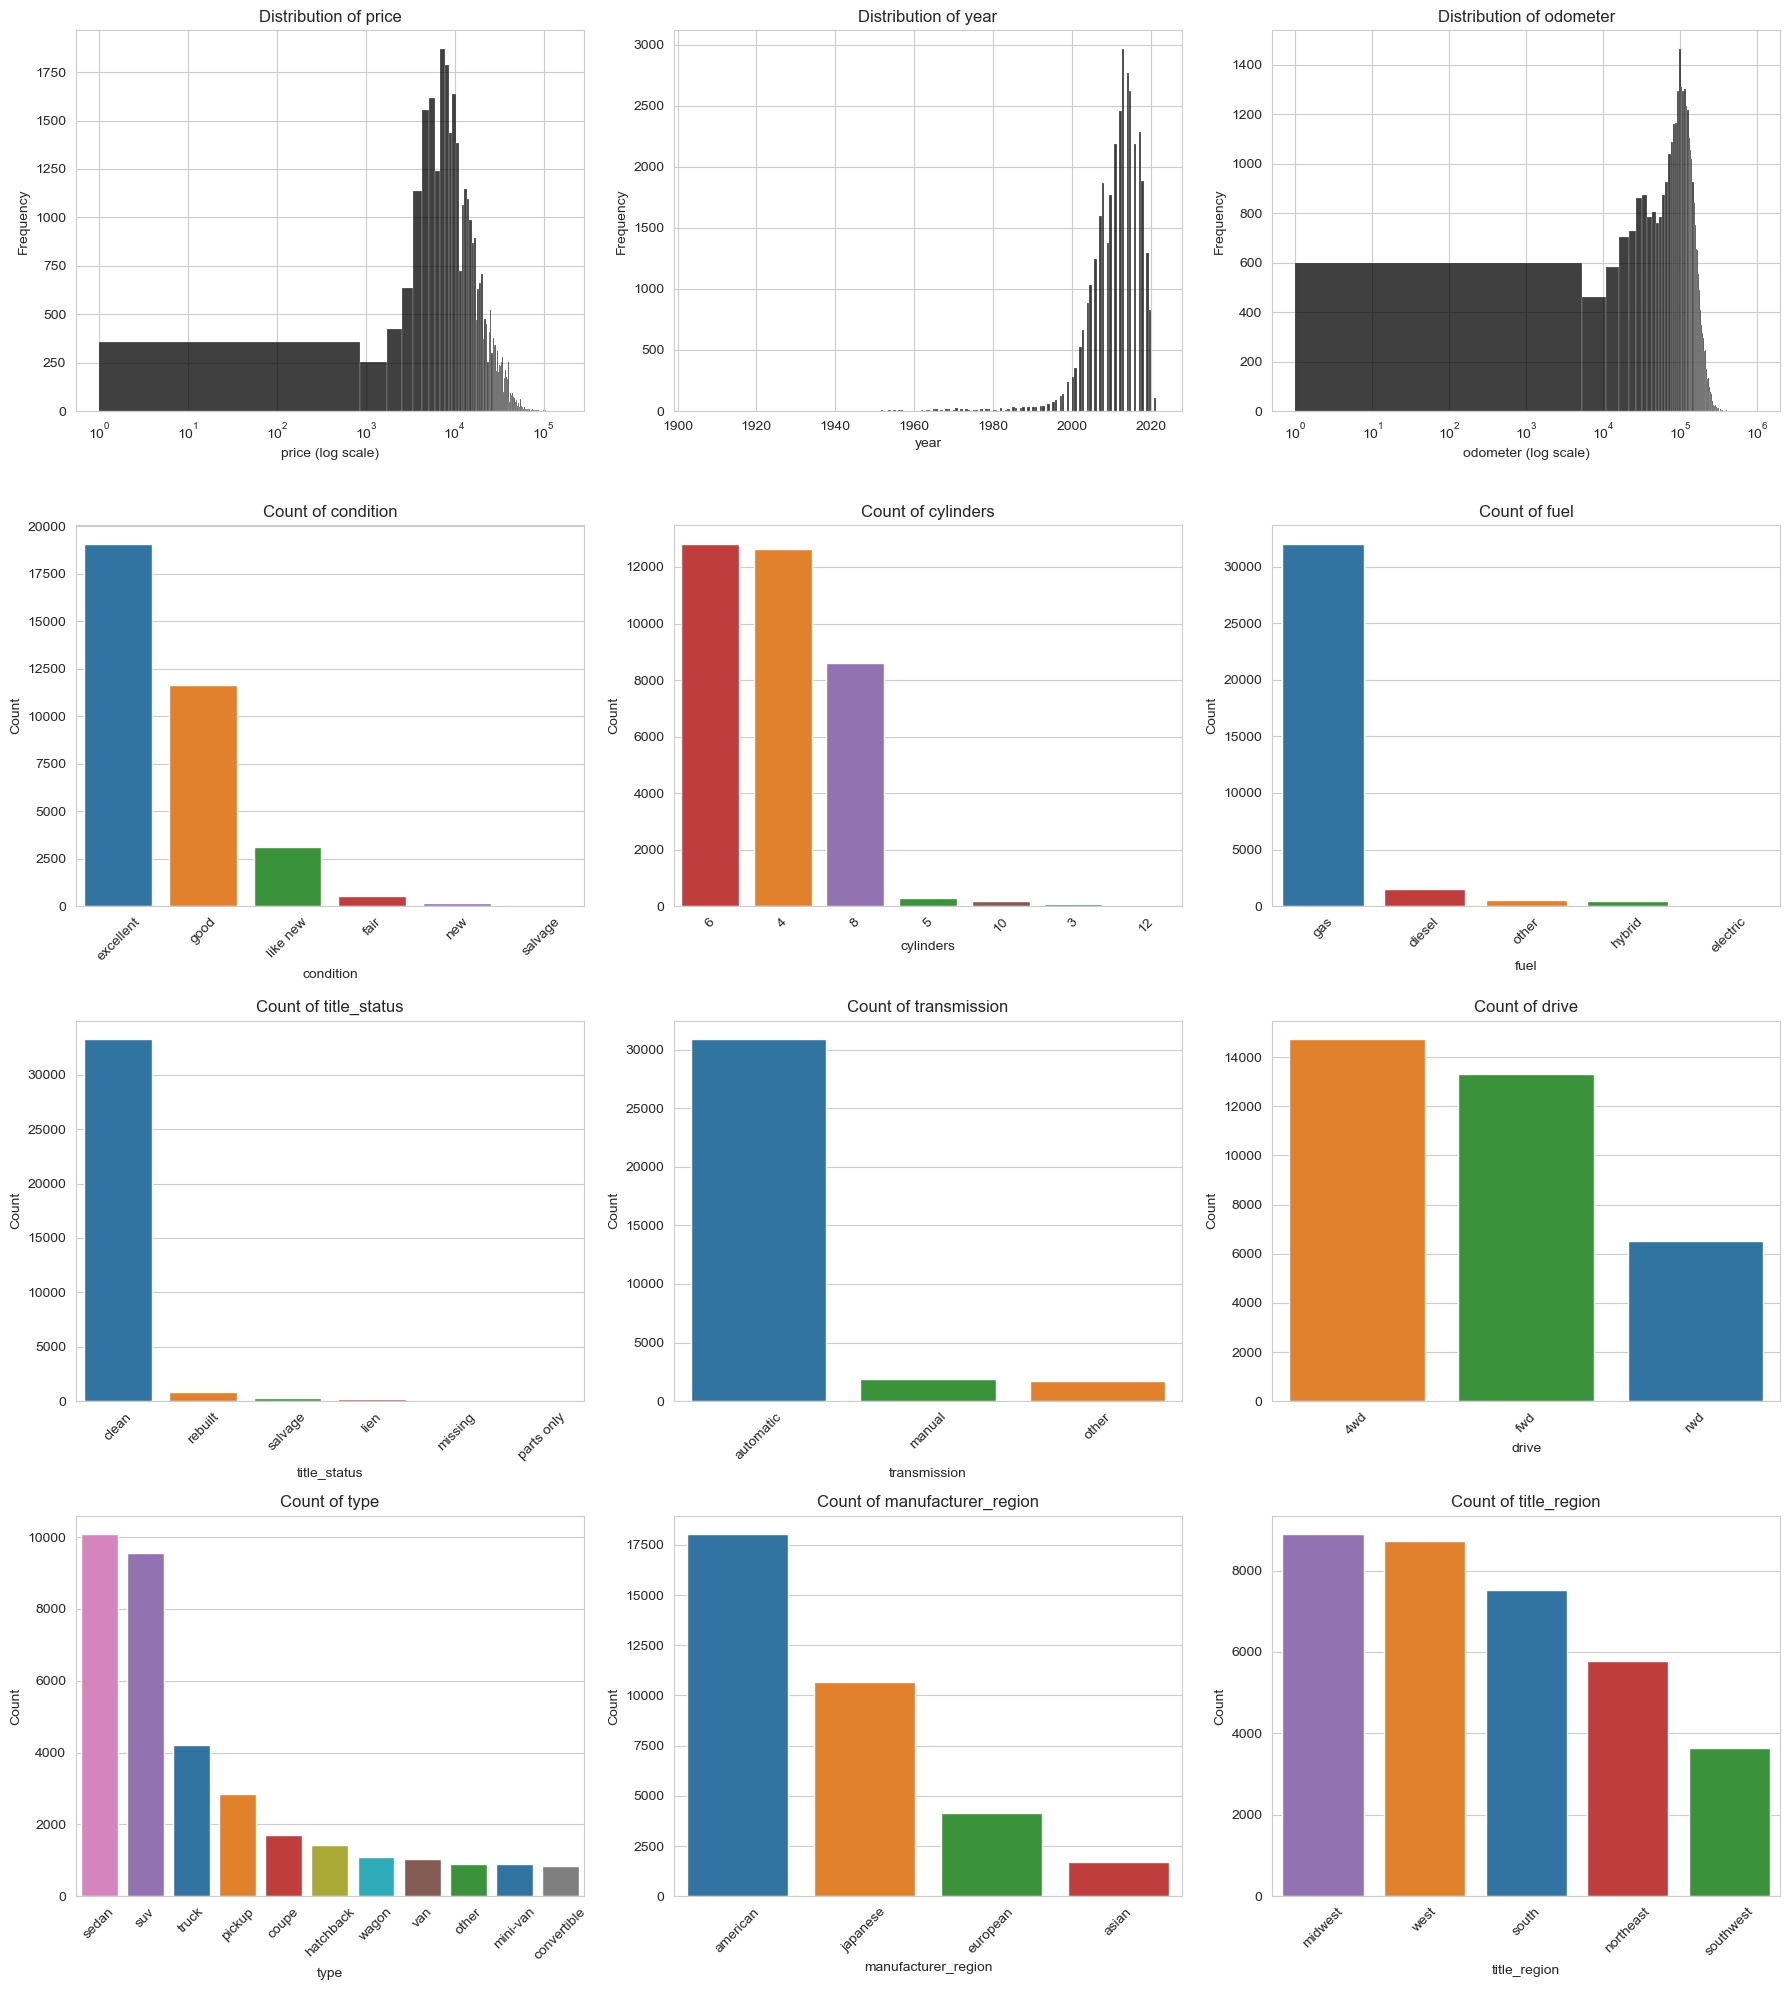

In [33]:
plt.figure(figsize=(18, 20))

numeric_cols = ['price', 'year', 'odometer']
categorical_cols = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission',
                    'drive', 'type', 'manufacturer_region', 'title_region']

total_plots = len(numeric_cols) + len(categorical_cols)

for idx, col in enumerate(numeric_cols + categorical_cols):
    plt.subplot((total_plots + 2) // 3, 3, idx + 1)

    if col in numeric_cols:
        data = working_df[col]

        # Apply log scale only to skewed numeric variables
        if col in ['price', 'odometer']:
            # Avoid log(0) issues
            data = data[data > 0]
            sns.histplot(data, kde=False, bins="sqrt", color='black')
            plt.xscale('log')
            plt.xlabel(f"{col} (log scale)")
        else:
            sns.histplot(data, kde=False, bins="sqrt", color='black')
            plt.xlabel(col)

        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')

    else:
        order = working_df[col].value_counts().index
        sns.countplot(data=working_df, x=col, order=order, hue=col, palette='tab10', legend=False)
        plt.xticks(rotation=45)
        plt.ylabel('Count')
        plt.title(f'Count of {col}')

plt.tight_layout()
plt.show()

In [34]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34592 entries, 0 to 34679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                34592 non-null  int64  
 1   year                 34592 non-null  float64
 2   condition            34592 non-null  object 
 3   cylinders            34592 non-null  int64  
 4   fuel                 34592 non-null  object 
 5   odometer             34592 non-null  float64
 6   title_status         34592 non-null  object 
 7   transmission         34592 non-null  object 
 8   drive                34592 non-null  object 
 9   type                 34592 non-null  object 
 10  manufacturer_region  34592 non-null  object 
 11  title_region         34592 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.4+ MB


FEATURE ENCODING

In [35]:
# ----- Columns -----
ordinal_col = ['condition']
ordinal_order = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]

nominal_cols = [
    'fuel', 'title_status', 'transmission', 'drive',
    'type', 'manufacturer_region', 'title_region'
]

numeric_cols = ['price', 'year', 'odometer', 'cylinders']

# ----- Transformers -----
ordinal_enc = OrdinalEncoder(categories=ordinal_order)
nominal_enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('ordinal', ordinal_enc, ordinal_col),
    ('nominal', nominal_enc, nominal_cols)
], remainder='passthrough')  # keep numeric features

# ----- Final pipeline -----
full_pipeline = Pipeline([
    ('encode', preprocessor)
])

# ----- Transform the dataset -----
working_df_transformed = full_pipeline.fit_transform(working_df)

# Get feature names
encoded_cols = list(full_pipeline.named_steps['encode'].transformers_[1][1].get_feature_names_out(nominal_cols))
final_columns = ordinal_col + encoded_cols + numeric_cols

working_df_encoded = pd.DataFrame(working_df_transformed, columns=final_columns)

In [36]:
working_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34592 entries, 0 to 34591
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   condition                     34592 non-null  float64
 1   fuel_diesel                   34592 non-null  float64
 2   fuel_electric                 34592 non-null  float64
 3   fuel_gas                      34592 non-null  float64
 4   fuel_hybrid                   34592 non-null  float64
 5   fuel_other                    34592 non-null  float64
 6   title_status_clean            34592 non-null  float64
 7   title_status_lien             34592 non-null  float64
 8   title_status_missing          34592 non-null  float64
 9   title_status_parts only       34592 non-null  float64
 10  title_status_rebuilt          34592 non-null  float64
 11  title_status_salvage          34592 non-null  float64
 12  transmission_automatic        34592 non-null  float64
 13  t

DATA SPLITTING

In [37]:
# Step 1: isolate features and target
X = working_df_encoded.drop("price", axis=1)
y = working_df_encoded["price"]

# Step 2: split into train_temp (80%) and test (20%)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: split train_temp into train (75% of 80%) and dev (25% of 80%)
X_train, X_dev, y_train, y_dev = train_test_split(
    X_train_temp, y_train_temp, test_size=0.25, random_state=42
)
working_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34592 entries, 0 to 34591
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   condition                     34592 non-null  float64
 1   fuel_diesel                   34592 non-null  float64
 2   fuel_electric                 34592 non-null  float64
 3   fuel_gas                      34592 non-null  float64
 4   fuel_hybrid                   34592 non-null  float64
 5   fuel_other                    34592 non-null  float64
 6   title_status_clean            34592 non-null  float64
 7   title_status_lien             34592 non-null  float64
 8   title_status_missing          34592 non-null  float64
 9   title_status_parts only       34592 non-null  float64
 10  title_status_rebuilt          34592 non-null  float64
 11  title_status_salvage          34592 non-null  float64
 12  transmission_automatic        34592 non-null  float64
 13  t

In [38]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_test.shape, y_dev.shape)

(20754, 41) (20754,)
(6919, 41) (6919,)
(6919, 41) (6919,)


SCALING

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

In [41]:
X_train_scaled_df.head()

,condition,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,...,manufacturer_region_european,manufacturer_region_japanese,title_region_midwest,title_region_northeast,title_region_south,title_region_southwest,title_region_west,year,odometer,cylinders
1506,-1.090424,-0.212663,-0.034728,0.283008,-0.117998,-0.127308,0.196822,-0.069931,-0.019637,-0.009817,...,-0.370497,-0.663589,-0.591113,-0.447989,-0.525573,2.930968,-0.582284,0.685023,0.141265,-0.951389
26882,-1.090424,-0.212663,-0.034728,0.283008,-0.117998,-0.127308,0.196822,-0.069931,-0.019637,-0.009817,...,2.699079,-0.663589,-0.591113,-0.447989,-0.525573,-0.341184,1.717376,-0.954798,1.406887,0.580712
9697,0.415576,-0.212663,-0.034728,0.283008,-0.117998,-0.127308,0.196822,-0.069931,-0.019637,-0.009817,...,2.699079,-0.663589,-0.591113,-0.447989,1.902686,-0.341184,-0.582284,-0.544842,0.141265,0.340051
7448,-1.090424,-0.212663,-0.034728,0.283008,-0.117998,-0.127308,0.196822,-0.069931,-0.019637,-0.009817,...,-0.370497,-0.663589,-0.591113,2.232197,-0.525573,-0.341184,-0.582284,-0.681494,1.406887,0.503880
822,0.415576,-0.212663,-0.034728,0.283008,-0.117998,-0.127308,0.196822,-0.069931,-0.019637,-0.009817,...,-0.370497,-0.663589,-0.591113,-0.447989,-0.525573,-0.341184,1.717376,1.094979,0.141265,-1.605121


CREATING POLY FEATURES

In [42]:
input_features = X.columns

deg = 3
poly = PolynomialFeatures(degree=deg, include_bias=False)

# Fit + transform train only
X_train_poly = poly.fit_transform(X_train_scaled)
X_dev_poly = poly.transform(X_dev_scaled)
X_test_poly = poly.transform(X_test_scaled)

feature_names = poly.get_feature_names_out(input_features=input_features)

In [43]:
pca = PCA(n_components=41, random_state=42)
X_train_pca = pca.fit_transform(X_train_poly)
X_dev_pca = pca.transform(X_dev_poly)
X_test_pca = pca.transform(X_test_poly)

print(f"Original feature count: {X_train.shape[1]}")
print(f"Reduced to: {X_train_pca.shape[1]} components")


Original feature count: 41
Reduced to: 41 components


In [44]:
type(X_train_pca)

numpy.ndarray

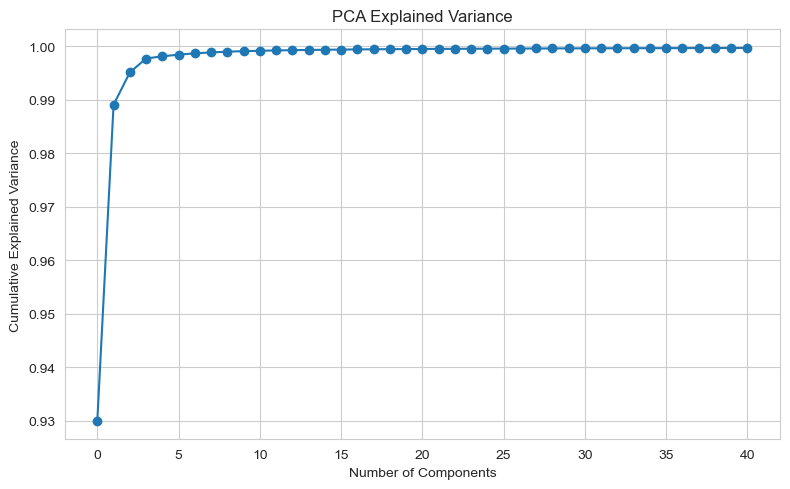

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
type(X)

pandas.core.frame.DataFrame

In [47]:
type(X_train_scaled)

numpy.ndarray

In [48]:
type(X_train_poly)

numpy.ndarray

In [49]:
type(X_train_pca)

numpy.ndarray

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

TESTING A FEW DIFFERENT MODEL TYPES

LINEAR REGRESSION

WITHOUT REGULARIZATION THIS MODEL IS NOT USABLE WITH POLY FEATURES

In [50]:
# # Fit model
# lr = LinearRegression()
# lr.fit(X_train_poly, y_train)
#
# # Predict
# y_pred = lr.predict(X_dev_poly)

In [51]:
# # Evaluate
# print("MAE", mean_absolute_error(y_dev, y_pred))
# print("R Score:", r2_score(y_dev, y_pred))

THIS MODEL WITH DEGREE 2 HAS BEEN GREAT AS A FAST PERFORMING TEST PROXY

In [52]:
model = Ridge(alpha=100)
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_dev_poly)

In [53]:
print("MSE", mean_squared_error(y_dev, y_pred))
print("R Score:", r2_score(y_dev, y_pred))

MSE 107866198.7531412
R Score: 0.32026095207260386


SENSITIVITY TO HIGH VALUES IS EVIDENT HERE, SWITCHING TO MAE

In [54]:
print("MAE", mean_absolute_error(y_dev, y_pred))
print("R Score:", r2_score(y_dev, y_pred))

MAE 5294.789465123291
R Score: 0.32026095207260386


PCA TEST BLOCK

In [128]:
# test_results = {"MAE": [], "R":[], "num_C":[]}
# # components_values = [5,10, 15, 20, 25, 30, 35, 40]
# components_values = [x for x in range(1,41)]
#
# # Step 1: Create polynomial features once from scaled data
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train_poly = poly.fit_transform(X_train_scaled)
# X_dev_poly = poly.transform(X_dev_scaled)
# X_test_poly = poly.transform(X_test_scaled)
#
# for value in components_values:
#     # Step 2: Apply PCA on poly features
#     pca = PCA(n_components=value, random_state=42)
#     X_train_pca = pca.fit_transform(X_train_poly)
#     X_dev_pca = pca.transform(X_dev_poly)
#     X_test_pca = pca.transform(X_test_poly)
#
#     # Step 3: Fit Ridge on PCA-reduced features
#     model = Ridge(alpha=1.0)
#     model.fit(X_train_pca, y_train)
#     y_pred = model.predict(X_dev_pca)
#
#     # Step 4: Store results
#     test_results["MAE"].append(mean_absolute_error(y_dev, y_pred))
#     test_results["R"].append(r2_score(y_dev, y_pred))
#     test_results["num_C"].append(value)
#
# pd.DataFrame(test_results)

,MAE,R,num_C
0,9290.039770,-0.000117,1
1,9285.977420,0.000350,2
2,9285.951618,0.000651,3
3,9282.194868,0.001067,4
4,9279.073460,0.001804,5
5,9256.990499,0.004328,6
6,9135.966448,0.019323,7
7,9133.836291,0.019238,8
8,9126.935636,0.023646,9
9,9108.704920,0.028387,10


MAX COMPONENTS SEEMS TO PROVIDE THE BEST PERFORMANCE-BASED RESULTS

ALPHA TEST BLOCK

In [129]:
# Testing various values of alpha
# alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
# model = RidgeCV(alphas=alphas, scoring='neg_mean_absolute_error', cv=5)
# model.fit(X_train_pca, y_train)
# print("Best alpha:", model.alpha_)

Best alpha: 100.0


EXPLORING RANDOM FOREST REGRESSION

In [191]:
# rf_model = RandomForestRegressor(
#     n_estimators=100,
#     max_depth=None,
#     random_state=42,
#     n_jobs=-1
# )
#
# # Train
# rf_model.fit(X_train_pca, y_train)
#
# # Predict on dev set
# y_pred_rf = rf_model.predict(X_dev_pca)
#
# # Evaluate
# print("MAE (RF):", mean_absolute_error(y_dev, y_pred_rf))
# print("R Score (RF):", r2_score(y_dev, y_pred_rf))


GRID SEARCH

In [70]:
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
# }
#
# grid = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_grid, cv=3, scoring='neg_mean_absolute_error')
# grid.fit(X_train_pca, y_train)
#
# print("Best Params:", grid.best_params_)

Best Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [56]:
# best_rf = grid.best_estimator_
# y_pred_rf = best_rf.predict(X_dev_pca)
#
# print("MAE (Tuned RF):", mean_absolute_error(y_dev, y_pred_rf))
# print("R Score (Tuned RF):", r2_score(y_dev, y_pred_rf))
# importances = rf_model.feature_importances_

BEST FOREST RESULTS WERE WITH DEGREE 3

In [57]:
best_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train_poly, y_train)

y_dev_pred = best_rf.predict(X_dev_poly)
y_test_pred = best_rf.predict(X_test_poly)

print("MAE (Dev):", mean_absolute_error(y_dev, y_dev_pred))
print("R Score (Dev):", r2_score(y_dev, y_dev_pred))

print("MAE (Test):", mean_absolute_error(y_test, y_test_pred))
print("R Score (Test):", r2_score(y_test, y_test_pred))

MAE (Dev): 4520.737590155215
R Score (Dev): 0.5862845346943539
MAE (Test): 4332.62137737704
R Score (Test): 0.6409273749732574


EXPLORING FEATURE IMPORTANCE

In [58]:
#Get feature names from the poly transformer
poly_feature_names = poly.get_feature_names_out(input_features=X.columns)

# Wrap the importances in a DataFrame
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': best_rf.feature_importances_
}).sort_values(by='importance', ascending=False)

feat_imp_df.head(10)


,feature,importance
9990,drive_4wd^2 year,0.264186
13241,odometer cylinders^2,0.055667
8775,transmission_automatic^2 odometer,0.037137
1802,fuel_diesel^2 cylinders,0.025208
11908,type_mini-van year odometer,0.012110
9992,drive_4wd^2 cylinders,0.010032
1879,fuel_diesel fuel_gas cylinders,0.007322
2306,fuel_diesel drive_rwd cylinders,0.007284
2175,fuel_diesel transmission_automatic odometer,0.007274
1800,fuel_diesel^2 year,0.007008


EXPLORING XGBOOST REGRESSION

In [59]:
xgb = XGBRegressor(
    n_estimators=250,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbosity=1
)

In [60]:
xgb.fit(X_train_poly, y_train)
y_dev_pred = xgb.predict(X_dev_poly)
y_test_pred = xgb.predict(X_test_poly)

print("MAE (Dev):", mean_absolute_error(y_dev, y_dev_pred))
print("R Score (Dev):", r2_score(y_dev, y_dev_pred))

print("\nMAE (Test):", mean_absolute_error(y_test, y_test_pred))
print("R Score (Test):", r2_score(y_test, y_test_pred))

MAE (Dev): 4321.176100624902
R Score (Dev): 0.6092498128500561

MAE (Test): 4164.005342837754
R Score (Test): 0.6619721572163263


EXPLORING FEATURE IMPORTANCE

In [61]:
# Wrap the importances in a DataFrame
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb.feature_importances_
}).sort_values(by='importance', ascending=False)

feat_imp_df.head(10)

,feature,importance
3358,fuel_electric year odometer,0.025978
7254,title_status_missing year odometer,0.018151
9990,drive_4wd^2 year,0.015826
9992,drive_4wd^2 cylinders,0.011941
8775,transmission_automatic^2 odometer,0.010829
12166,type_pickup type_truck year,0.009039
11908,type_mini-van year odometer,0.008713
9799,transmission_other type_pickup type_truck,0.007908
12575,type_truck^2 year,0.007011
2437,fuel_diesel type_sedan manufacturer_region_eur...,0.006324


EXPLORING SKLEARN HISTOGRAM GRADIENT BOOST REGRESSION

In [62]:
# # Define the model
# hgb = HistGradientBoostingRegressor(
#     max_iter=250,
#     learning_rate=0.06,
#     max_depth=8,
#     max_leaf_nodes=31,
#     l2_regularization=0.4,
#     random_state=42,
#     verbose=1
# )
#
# # Fit and predict
# hgb.fit(X_train_poly, y_train)
# y_dev_pred = hgb.predict(X_dev_poly)
# y_test_pred = hgb.predict(X_test_poly)
#
# # Evaluate
# print("MAE (Dev):", mean_absolute_error(y_dev, y_dev_pred))
# print("R Score (Dev):", r2_score(y_dev, y_dev_pred))
# print("\nMAE (Test):", mean_absolute_error(y_test, y_test_pred))
# print("R Score (Test):", r2_score(y_test, y_test_pred))

THIS MODEL PERFORMED ADMIRABLY, BUT THE RUNTIME FOR THESE NEXT TWO BLOCKS WAS LONGER THAN MODELING

In [63]:
# from sklearn.inspection import permutation_importance
# result = permutation_importance(hgb, X_dev_poly, y_dev, n_repeats=10, random_state=42, n_jobs=-1)

In [64]:
# pd.DataFrame({
#     'feature': feature_names,
#     'importance': result.importances_mean
# }).sort_values(by='importance', ascending=False)

RUNTIME TOO LONG WITH #RD DEGREE POLYNOMIALS

In [65]:
# from sklearn.ensemble import GradientBoostingRegressor
#
# gbr = GradientBoostingRegressor(
#     n_estimators=250,
#     learning_rate=0.05,
#     max_depth=6,
#     random_state=42
# )
#
# gbr.fit(X_train_poly, y_train)
# y_dev_pred = gbr.predict(X_dev_poly)
# y_test_pred = gbr.predict(X_test_poly)
#
# print("MAE (Dev):", mean_absolute_error(y_dev, y_dev_pred))
# print("R (Dev):", r2_score(y_dev, y_dev_pred))

In [66]:
# feat_imp_df = pd.DataFrame({
#     'feature': feature_names,
#     'importance': gbr.feature_importances_
# }).sort_values(by='importance', ascending=False)
#
# feat_imp_df.head(10)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

I experimented with several modeling approaches, including:
LinearRegression, RidgeRegression, RandomForestRegressor, XGBRegressor, HistGradientBoostingRegressor, and GradientBoostingRegressor.

Throughout the modeling process, I identified key data thresholds (e.g., price filters, missing data handling, feature encoding) and tested them rigorously for their impact on performance.

I selected Mean Absolute Error (MAE) as my primary evaluation metric because of the presence of extreme values in both price and odometer. I also tracked R (coefficient of determination) as a proxy for overall model fit and confidence.

I did extensive testing with PCA and performance was better without it.  It would not have been usable in this case anyway because of the loss of feature interpretability, which is what this project evolved to require.

After tuning, I was able to reduce MAE from ~$12,000s down to the $4,000s, and improve R from the 20th percentile to the 60s, depending on the model and data variant. My confidence in the findings was reinforced by my professional experience in the automotive industry, which aligned with many of the patterns uncovered by the models.

Among all tested algorithms, XGBRegressor delivered the best combination of accuracy and runtime efficiency. Even though XGBoost is a standalone library, it integrates seamlessly with scikit-learn, making it easy to use in a familiar pipeline.

While HistGradientBoostingRegressor showed competitive performance, it was difficult to extract feature importances in a straightforward way. I also tested the vanilla GradientBoostingRegressor, but its runtime was too long for marginal gains —

Key TakeAways:
1. We cannot directly observe buyer behavior, but we can infer patterns from listed features and prices.

2. Utilitarian vehicle features, such as truck or van body styles, four-wheel drive, and diesel engines, consistently emerged as top price predictors.

3. Cylinder count, especially V8 configurations, became impactful when interacting with drivetrain, body type, and fuel type, particularly for pickups and diesel models.

4. Older diesel vehicles, especially trucks, get higher pricing regardless of mileage or condition; probably because of their durability, commercial appeal, and resale culture.

5. European diesel vans/wagons also showed strong value retention, suggesting broad market trust in their longevity and efficiency.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Preface to stakeholders: "Ladies and/or Gentlemen what I am about to share with you will either be validating or enlightening."

I experimented with many models and despite the limitations of the data, the models were all able to capture important trends related to pricing.

My analysis allowed me to make the following conclusions about the dataset:

We cant capture anything customer related with current dataset. That will require someone to provide me with historic sales data.

In the absence of sales data, I am still able to point out some key observations about your current used car inventory:

It seems utilitarian traits such as diesel engines, four-wheel drive systems, and pickup truck body styles emerged as top predictive features across all leading models. This suggests that vehicles built for durability, towing, or work-related utility command higher prices and retain value more effectively.

I also observed that V8 engine configurations, especially when paired with diesel fuel or truck frames, consistently ranked high in interaction terms. Ultimately, our results affirm that your pricing reflects more than brand or age — it rewards vehicles designed for capability, reliability, and long-term use.

Noteably, diesel-powered European vehicles, especially vans and wagons, also scored high on value retention, likely due to their reputation for efficiency, longevity, and practicality in both fleet and family use cases.

Even without perfect predictive power, the model highlights pricing patterns that reflect universal value: utility, capability, and longevity.

These findings may indicate vehicles that have more profit potential than others.